#### Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:<br>

- Date — The date (yyyy-mm-dd format)<br>
- Consumption — Electricity consumption in GWh<br>
- Wind — Wind power production in GWh<br>
- Solar — Solar power production in GWh<br>
- Wind+Solar — Sum of wind and solar power production in GWh<br>

## Questions

- When is electricity consumption typically highest and lowest?
- How do wind and solar power production vary with seasons of the year?
- How do wind and solar power production compare with electricity consumption, and how has this ratio changed over time?

In [37]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [10]:
data = pd.read_csv("D:/Work/Mine/Data Science/Projects/Data Science/Time Series/OPSD.csv", parse_dates =['Date'])
data

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [12]:
data.shape

(4383, 5)

In [14]:
#Set date column as index
data = data.set_index('Date')
data.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [15]:
data.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [16]:
# Another way to parse dates as index
df= pd.read_csv("D:/Work/Mine/Data Science/Projects/Data Science/Time Series/OPSD.csv", index_col=0, parse_dates =True)
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [18]:
# Use pandas' powerful time-based indexing to analyze data
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Weekday Name'] = data.index.day_name()

#display random sample of 5 rows
data.sample(5, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Consumption   4383 non-null   float64
 1   Wind          2920 non-null   float64
 2   Solar         2188 non-null   float64
 3   Wind+Solar    2187 non-null   float64
 4   Year          4383 non-null   int64  
 5   Month         4383 non-null   int64  
 6   Weekday Name  4383 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 273.9+ KB


In [20]:
#Get a specific row
data.loc["2008-08-23"]

Consumption      1152.01
Wind                 NaN
Solar                NaN
Wind+Solar           NaN
Year                2008
Month                  8
Weekday Name    Saturday
Name: 2008-08-23 00:00:00, dtype: object

In [21]:
#Get a specific month
data.loc["2008-08"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-01,1328.425,NaN,NaN,NaN,2008,8,Friday
2008-08-02,1117.795,NaN,NaN,NaN,2008,8,Saturday
2008-08-03,1046.408,NaN,NaN,NaN,2008,8,Sunday
2008-08-04,1349.001,NaN,NaN,NaN,2008,8,Monday
2008-08-05,1344.579,NaN,NaN,NaN,2008,8,Tuesday
2008-08-06,1334.720,NaN,NaN,NaN,2008,8,Wednesday
2008-08-07,1359.001,NaN,NaN,NaN,2008,8,Thursday
2008-08-08,1327.802,NaN,NaN,NaN,2008,8,Friday
2008-08-09,1132.256,NaN,NaN,NaN,2008,8,Saturday


<AxesSubplot:xlabel='Date'>

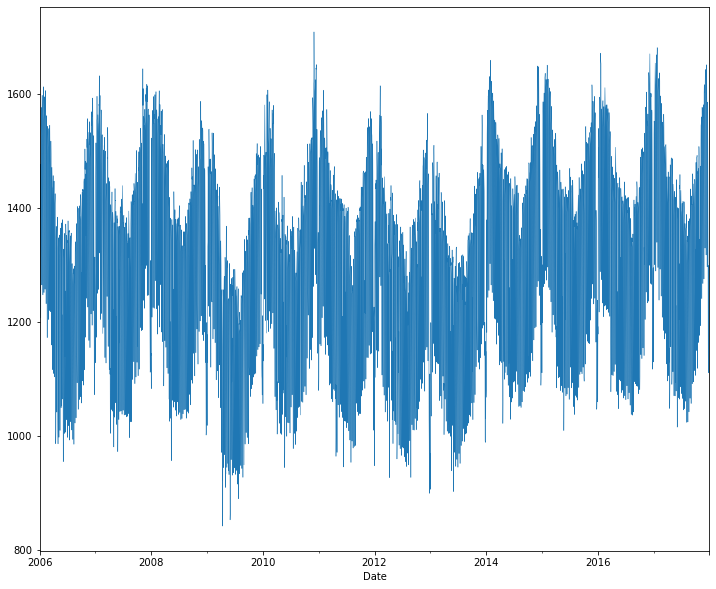

In [25]:
## Visualizing data
plt.figure(figsize=(12,10))
data['Consumption'].plot(linewidth = 0.5)

<Figure size 864x720 with 0 Axes>

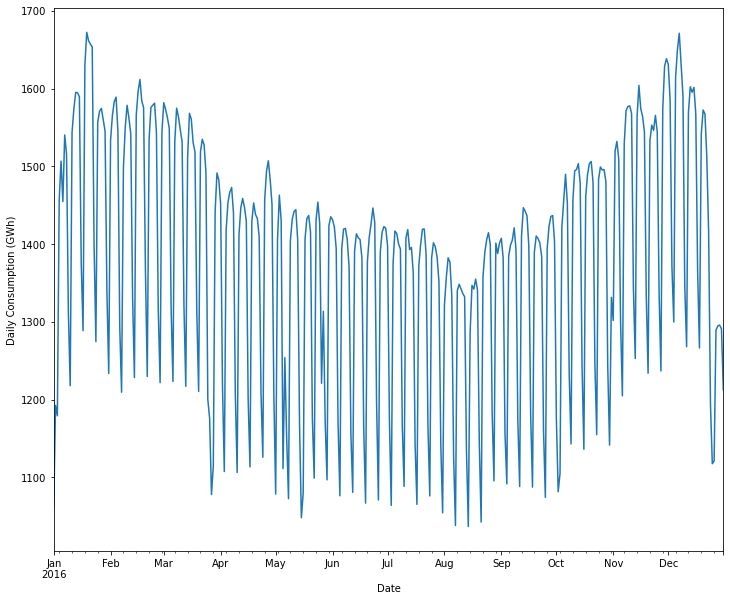

<Figure size 864x720 with 0 Axes>

In [31]:
# Plot on a year
plt.figure(figsize=(12,10))
ax = data.loc['2016', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');
plt.figure(figsize=(12,10))

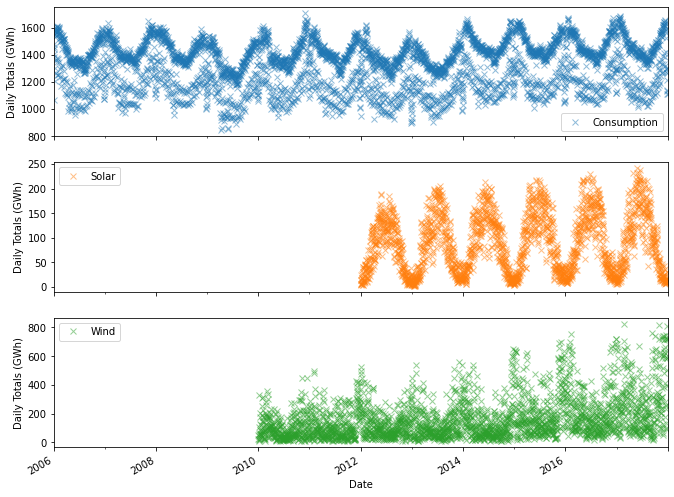

In [26]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = data[cols_plot].plot(marker='x', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

- Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.
- Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. 
- Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.
- There appears to be a strong increasing trend in wind power production over the years.
- Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.

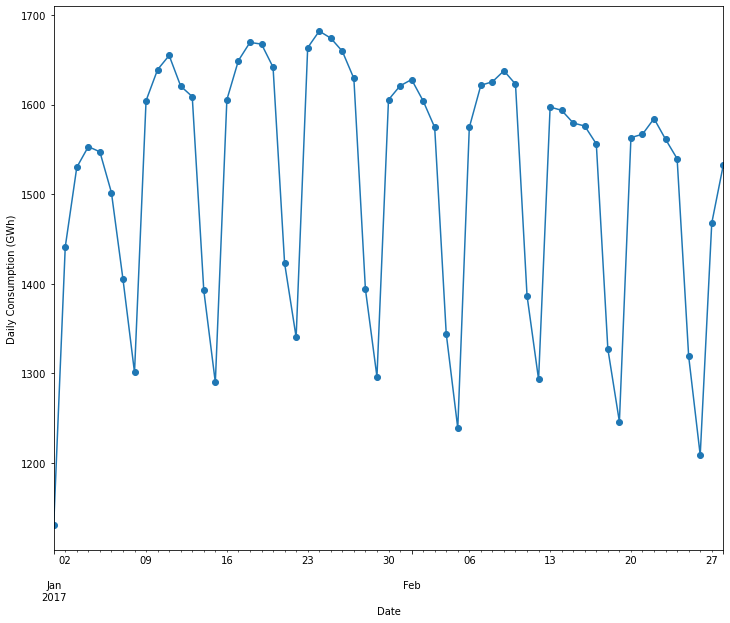

In [33]:
plt.figure(figsize=(12,10))
ax = data.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');

- It is seen from the graph that Consumptions are lower on weekends but higher on weekdays.

### Frequencies

When the data points of a time series are uniformly spaced in time (e.g., hourly, daily, monthly, etc.), the time series can be associated with a frequency in pandas.

In [46]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

### Resampling

We can resample our data to a lower or higher frequency.<br>
Resampling to a lower frequency (downsampling) usually involves an aggregation operation — for example, computing monthly sales totals from daily data.<br>
<br>
Resampling to a higher frequency (upsampling) is less common and often involves interpolation or other data filling method — for example, interpolating hourly weather data to 10 minute intervals for input to a scientific model

In [48]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
data_weekly_mean = data[data_columns].resample('W').mean()
data_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [52]:
print(data.shape)
print(data_weekly_mean.shape)

(4383, 7)
(627, 4)


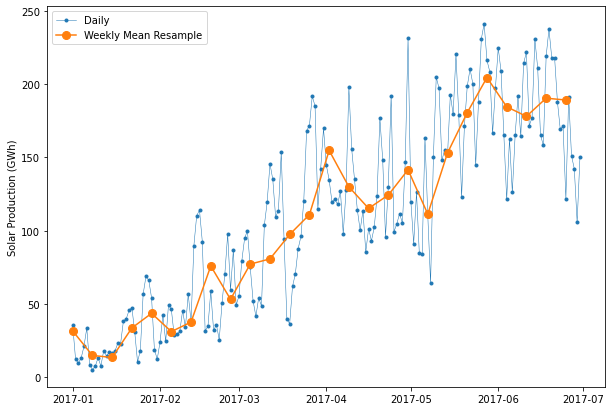

In [59]:

# Start and end of the date range to extract
start, end = '2017-01', '2017-06'

# Let’s plot the daily and weekly Solar time series together over a single six-month period to compare them
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(data.loc[start:end, 'Solar'], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(data_weekly_mean.loc[start:end, 'Solar'], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();


We can see that the weekly mean time series is smoother than the daily time series because higher frequency variability has been averaged out in the resampling.

In [62]:
data_monthly = data[data_columns].resample('M').sum(min_count=28)
data_monthly.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


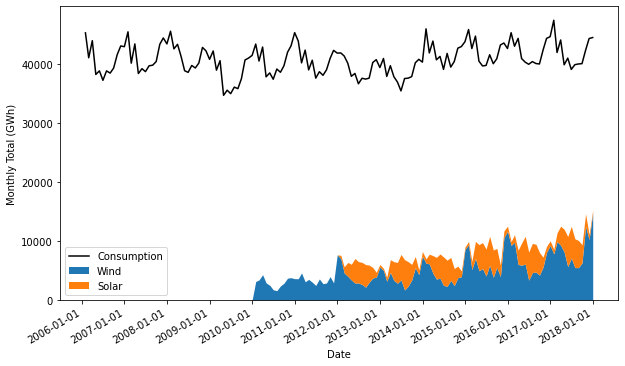

In [66]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(data_monthly['Consumption'], color='black', label='Consumption')
data_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

- Electricity consumption has been stable over the years.<br>
- Wind power and solar power has been growing steadily.

#### Now let's compute ratio of wind power to consumption.

In [76]:
data_annual = data[data_columns].resample('A').sum(min_count=360)

data_annual = data_annual.set_index(data_annual.index.year)
data_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
data_annual['Wind+Solar/Consumption'] = data_annual['Wind+Solar'] / data_annual['Consumption']
data_annual.tail()

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


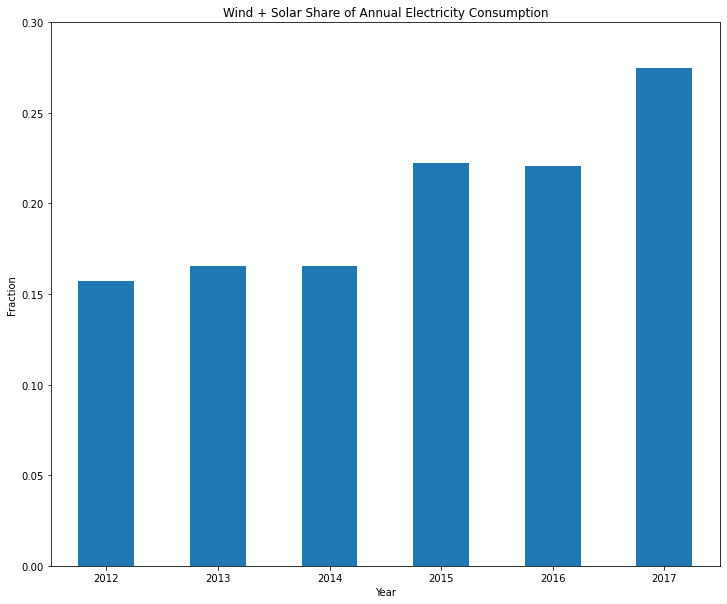

In [79]:
plt.figure(figsize=(12,10))
ax = data_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);

We can see that wind + solar production as a share of annual electricity consumption has been increasing from about 15% in 2012 to about 27% in 2017